# Crop Images

In [3]:
# Adjust this number depending on the CNN model
image_size = 299 # (e.g. MobileNet, DenseNet: 224, Xception: 299)

In [2]:
import os

cropped_images_storage_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/cropped_images_{image_size}x{image_size}px"

if not os.path.exists(cropped_images_storage_path):
    os.makedirs(cropped_images_storage_path)

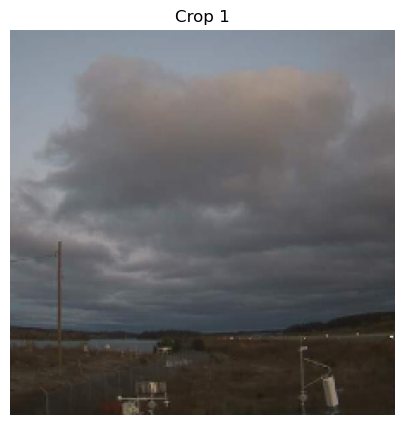

In [9]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt  # Import matplotlib for displaying images

def crop_below_last_black_row(image):
    # Initialize the crop row index
    last_black_row = -1

    # Iterate through each row to find the last row with a pure black pixel
    for i, row in enumerate(image):
        if np.all(row == [0, 0, 0], axis=1).any():  # Check if there's a pure black pixel in the row
            last_black_row = i

    # If a black row was found, crop the image below this row
    if last_black_row != -1:
        last_black_row = min(72, last_black_row) # Maximum bound for top header is 72px
        image = image[last_black_row+1:, :]

    return image

def center_crop_and_downscale_image(image, crop_size=(448, 448), final_size=(224, 224)):
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    start_x = max(center_x - crop_size[1] // 2, 0)
    start_y = max(center_y - crop_size[0] // 2, 0)

    crop = image[start_y:start_y + crop_size[0], start_x:start_x + crop_size[1]]
    downscale_crop = cv2.resize(crop, final_size)  # Resize the crop to the final size
    return [downscale_crop]  # Return as a list for consistency

def process_and_crop_image(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Crop the image below the last black row
    cropped_image = crop_below_last_black_row(image)

    # Center crop a 448x448 region from the image and downscale it to 224x224
    center_crop = center_crop_and_downscale_image(cropped_image)

    return center_crop

def save_cropped_images(image_path):
    try:
        # Ensure the save directory exists
        if not os.path.exists(cropped_images_storage_path):
            os.makedirs(cropped_images_storage_path)

        # Process and crop the image
        cropped_images = process_and_crop_image(image_path)

        # Iterate over the cropped images and save them
        for i, cropped_image in enumerate(cropped_images):
            # Generate a unique filename for each cropped image
            filename = f"{image_path.split('/')[-1].split('.')[0]}-{i+1}.jpg"
            file_path = os.path.join(cropped_images_storage_path, filename)

            # Save the cropped image to the specified directory
            cv2.imwrite(file_path, cropped_image)
    except Exception as e:
        print(f"Error processing {image_path}: {e}")

def show_crops(crops):
    for i, crop in enumerate(crops):
        plt.figure(figsize=(5, 5))  # Set figure size
        plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying
        plt.title(f"Crop {i+1}")
        plt.axis('off')  # Hide axis
        plt.show()

# Example usage
image_path = '/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYIV_2023_202310_NavCan-WxCams_CYIV-SE_2023-10-07/CYIV-SE-2023_10_07-00_04_30.jpg'
image_crops = process_and_crop_image(image_path)
show_crops(image_crops)
save_cropped_images(image_path)

In [10]:
provincial_code = ['AB', 'BC', 'MB', 'NF', 'NS', 'NT', 'NU', 'ON', 'QC', 'YT']
provincial_report = [code + '_ASOS_Matched.csv' for code in provincial_code]

In [11]:
import pandas as pd
import os

reports = {}

for report, code in zip(provincial_report, provincial_code):
    reports[code] = pd.read_csv(report)

/var/tmp/pbs.264842721.ppp5pbs-001-ib/ipykernel_1630788/3544983199.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(report)
/var/tmp/pbs.264842721.ppp5pbs-001-ib/ipykernel_1630788/3544983199.py:7: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(report)
/var/tmp/pbs.264842721.ppp5pbs-001-ib/ipykernel_1630788/3544983199.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(report)
/var/tmp/pbs.264842721.ppp5pbs-001-ib/ipykernel_1630788/3544983199.py:7: DtypeWarning: Columns (2,9) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(report)


In [12]:
from multiprocessing import Pool, cpu_count

def process_cropping_images(reports):
    image_infos = []
    for code in reports.keys():
        for matched_image_name, matched_folder_name in zip(reports[code]["matched_image_file"], reports[code]["matched_image_folder"]):
            if not pd.isna(matched_image_name) and not pd.isna(matched_folder_name):
                image_path = os.path.join(matched_folder_name, matched_image_name)
                image_infos.append(image_path)
                
    with Pool(processes=cpu_count()) as pool:
        results = pool.map(save_cropped_images, image_infos)

process_cropping_images(reports)

Premature end of JPEG file
Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYQL_2024_202401_NavCan-WxCams_CYQL-SW_2024-01-11/CYQL-SW-2024_01_11-22_55_30.jpg: 'NoneType' object is not iterable
Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYQF_2024_202401_NavCan-WxCams_CYQF-W_2024-01-11/CYQF-W-2024_01_11-22_55_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file
Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYYQ_2023_202311_NavCan-WxCams_CYYQ-N_2023-11-28/CYYQ-N-2023_11_28-12_04_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYYQ_2023_202311_NavCan-WxCams_CYYQ-N_2023-11-18/CYYQ-N-2023_11_18-10_44_30.jpg: 'NoneType' object is not iterable
Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYHZ_2023_202301_NavCan-WxCams_CYHZ-NE_2023-01-19/CYHZ-NE-2023_01_19-01_44_30.jpg: 'NoneType' object is not iterable
Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYYQ_2023_202301_NavCan-WxCams_CYYQ-N_2023-01-19/CYYQ-N-2023_01_19-01_44_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYVM_2023_202301_NavCan-WxCams_CYVM-SW_2023-01-19/CYVM-SW-2023_01_19-01_44_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file
Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYDB_2023_202311_NavCan-WxCams_CYDB-S_2023-11-18/CYDB-S-2023_11_18-10_24_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file
Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYTE_2024_202401_NavCan-WxCams_CYTE-E_2024-01-11/CYTE-E-2024_01_11-22_55_30.jpg: 'NoneType' object is not iterable
Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYAB_2024_202401_NavCan-WxCams_CYAB-SE_2024-01-11/CYAB-SE-2024_01_11-22_54_30.jpg: 'NoneType' object is not iterable
Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYXP_2024_202401_NavCan-WxCams_CYXP-NE_2024-01-11/CYXP-NE-2024_01_11-22_55_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file
Premature end of JPEG file


Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYCY_2023_202311_NavCan-WxCams_CYCY-N_2023-11-18/CYCY-N-2023_11_18-11_04_30.jpg: 'NoneType' object is not iterable
Error processing /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/CYQB_2024_202401_NavCan-WxCams_CYQB-SW_2024-01-11/CYQB-SW-2024_01_11-22_55_30.jpg: 'NoneType' object is not iterable


Premature end of JPEG file


# Classify Valid vs Invalid Images

In [7]:
from skimage import io, color
import numpy as np
import os
import shutil
from tqdm import tqdm
import concurrent.futures

images_storage_path = "/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3"

valid_images_path = os.path.join(images_storage_path, f'valid_images_{image_size}x{image_size}px')
# invalid_images_path = os.path.join(images_storage_path, f'invalid_images_{image_size}x{image_size}px')
# not_found_images_path = os.path.join(images_storage_path, f'not_found_images_{image_size}x{image_size}px')

# Ensure destination folders exist, create if not
os.makedirs(valid_images_path, exist_ok=True)
# os.makedirs(invalid_images_path, exist_ok=True)
# os.makedirs(not_found_images_path, exist_ok=True)

brightness_threshold = 0.3  # Adjust based on your needs

def analyze_and_copy_image(filename):
    image_path = os.path.join(cropped_images_storage_path, filename)
    if os.path.isdir(image_path) or os.path.getsize(image_path) < 6000:
        # Skip directories and files smaller than 6000 bytes
        return
    
    # Function to analyze the image
    def analyze_image(image_path):
        try:
            image = io.imread(os.path.join(cropped_images_storage_path, image_path))

            # Calculate the total number of pixels
            total_pixels = image.shape[0] * image.shape[1]

            # Assuming the image is in RGB
            if len(image.shape) == 3 and image.shape[2] == 3:
                # Count pure white and pure black pixels
                white_pixels = np.sum(np.all(image == [255, 255, 255], axis=-1))
                black_pixels = np.sum(np.all(image == [0, 0, 0], axis=-1))

                # Check conditions for the image to be considered "not found"
                if white_pixels / total_pixels > 0.9:
                    return "not_found"

            # Convert to grayscale to check for "too dark" condition
            gray_image = color.rgb2gray(image)
            average_brightness = np.mean(gray_image)

            # Check if the image is too dark
            if average_brightness < brightness_threshold:
                return "too_dark"

            # If none of the above conditions are met, the image is valid
            return "valid"
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
            return "not_found"

    result = analyze_image(image_path)
    if result == "valid":
        shutil.copy(image_path, os.path.join(valid_images_path, filename))
    elif result == "too_dark":
        # shutil.copy(image_path, os.path.join(invalid_images_path, filename))
        pass
    else:  # Image considered as "not found"
        # shutil.copy(image_path, os.path.join(not_found_images_path, filename))
        pass

# Use ProcessPoolExecutor to parallelize image processing
# Iterate from 1 to 100 to process the entire dataset
def process_x_percent_dataset(current_percent):
    filenames = os.listdir(cropped_images_storage_path)
    one_percent = len(filenames) // 100
    start_idx = one_percent * (current_percent - 1)
    end_idx = one_percent * current_percent
    print(f"Processing files from file no.{start_idx} to file no.{end_idx} out of total {len(filenames)} files.")
    with concurrent.futures.ProcessPoolExecutor() as executor:
        list(tqdm(executor.map(analyze_and_copy_image, filenames[start_idx:end_idx]), total=end_idx-start_idx))

In [ ]:
for percent in range(1, 101):
    process_x_percent_dataset(percent)

# Classify Images Into Classes

In [6]:
provincial_code = ['AB', 'BC', 'MB', 'NF', 'NS', 'NT', 'NU', 'ON', 'QC', 'YT']
provincial_report = [code + '_ASOS_Matched.csv' for code in provincial_code]

In [7]:
import pandas as pd
import os

reports = {}

for report, code in zip(provincial_report, provincial_code):
    reports[code] = pd.read_csv(report)

/var/tmp/pbs.266266030.ppp5pbs-001-ib/ipykernel_2059567/3544983199.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/tmp/pbs.266266030.ppp5pbs-001-ib/ipykernel_2059567/3544983199.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(report)
/var/tmp/pbs.266266030.ppp5pbs-001-ib/ipykernel_2059567/3544983199.py:7: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  reports[code] = pd.read_csv(report)
/var/tmp/pbs.266266030.ppp5pbs-001-ib/ipykernel_2059567/35

In [8]:
report_comb = pd.concat([reports[code] for code in reports.keys()], keys=list(reports.keys()))

In [9]:
report_comb.head()

station             valid  tmpc    dwpc   relh    drct  sknt     mslp  \
AB 0    CYQF  2022-12-16 00:00  -8.0  -11.00  79.00  240.00  5.00  1032.60   
   1    CYQL  2022-12-16 00:00  -6.0   -9.00  79.31  250.00  4.00  1034.00   
   2    CYLL  2022-12-16 00:00 -15.0  -17.00  84.68  280.00  6.00  1030.50   
   3    CYOJ  2022-12-16 00:00 -12.0  -13.00  92.25  180.00  2.00  1028.70   
   4    CYZU  2022-12-16 00:00  -4.0   -7.00  79.62  290.00  4.00  1030.40   

      p01m   vsby  ...   Hail     GS     IP     DZ FZRA/FZDZ  \
AB 0   0.0   9.00  ...  False  False  False  False     False   
   1   0.0  25.00  ...  False  False  False  False     False   
   2   0.0   6.00  ...  False  False  False  False     False   
   3   0.0  10.00  ...  False  False  False  False     False   
   4   0.0  15.00  ...  False  False  False  False     False   

     precipitation_category             valid_dt matched_image_file  \
AB 0                MISSING  2022-12-16 00:00:00                NaN   
   1                MISSING  2022-12-16 00:00:00                NaN   
   2                    NaN  2022-12-16 00:00:00                NaN   
   3              SNOW_ONLY  2022-12-16 00:00:00                NaN   
   4                MISSING  2022-12-16 00:00:00                NaN   

     matched_image_folder p01i  
AB 0                  NaN  NaN  
   1                  NaN  NaN  
   2                  NaN  NaN  
   3                  NaN  NaN  
   4                  NaN  NaN  

[5 rows x 35 columns]

In [10]:
import numpy as np

#initialise class names and view them
ORIG_CLASS_NAMES = [category for category in list(report_comb['precipitation_category'].unique()) if not pd.isna(category)]
ORIG_CLASS_NAMES = np.array(ORIG_CLASS_NAMES)
print(ORIG_CLASS_NAMES)
print(len(ORIG_CLASS_NAMES))

['MISSING' 'SNOW_ONLY' 'RAIN_ONLY' 'RAIN_AND_SNOW' 'ICE' 'DRIZZLE_ONLY'
 'FREEZING_PRECIP']
7


In [11]:
import numpy as np

#initialise class names and view them
CLASS_NAMES = [category for category in list(report_comb['precipitation_category'].unique()) if not pd.isna(category)]
CLASS_NAMES = np.array(CLASS_NAMES)
print(CLASS_NAMES)
print(len(CLASS_NAMES))

['MISSING' 'SNOW_ONLY' 'RAIN_ONLY' 'RAIN_AND_SNOW' 'ICE' 'DRIZZLE_ONLY'
 'FREEZING_PRECIP']
7


In [12]:
map_class_names = {
    'MISSING': 'MISSING',
    'SNOW_ONLY': 'SNOW_ONLY',
    'RAIN_ONLY': 'RAIN_ONLY',
    'RAIN_AND_SNOW': 'SNOW_ONLY',
    'ICE': 'ICE',
    'DRIZZLE_ONLY': 'RAIN_ONLY',
    'FREEZING_PRECIP': 'RAIN_ONLY',
}

In [13]:
import os

def create_class_directories(parent_dir_path):
    # Check if the main directory exists, if not, create it
    if not os.path.exists(parent_dir_path):
        os.makedirs(parent_dir_path)

    # Iterate through the list of categories and create each as a subdirectory
    for category in set(map_class_names.values()):
        subdirectory_path = os.path.join(parent_dir_path, category)
        if not os.path.exists(subdirectory_path):
            os.makedirs(subdirectory_path)
            print(f"Created subdirectory: {subdirectory_path}")
        else:
            print(f"Subdirectory already exists: {subdirectory_path}")

In [19]:
parent_dir_path = f'/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_{image_size}x{image_size}px'
create_class_directories(parent_dir_path)

Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_299x299px/ICE
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_299x299px/MISSING
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_299x299px/RAIN_ONLY
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_299x299px/SNOW_ONLY


In [20]:
import pandas as pd
import os
import shutil
from tqdm import tqdm

def process_and_copy_images(src_dir_path, tgt_dir_path):
    # Iterate through all files in the directory
    for filename in tqdm(os.listdir(src_dir_path)):
        try:
            # Define the full file path
            src_file_path = os.path.join(src_dir_path, filename)

            # Check if the file is a file and not a directory
            if os.path.isfile(src_file_path):
                # Check if the filename matches any in the 'matched_image_file' column
                matched = report_comb[report_comb['matched_image_file'] == ('-'.join(filename.split('.')[0].split('-')[:-1]) + '.jpg')]

                # If there's a match, proceed
                if not matched.empty:
                    # Read the 'precipitation_category' from the matched row
                    category_name = matched['precipitation_category'].values[0]

                    if category_name in map_class_names.keys():
                        category_name = map_class_names[category_name]
                    else:
                        continue

                    if pd.isna(category_name):
                        continue

                    # Define the target directory based on the category
                    tgt_sub_dir_path = os.path.join(tgt_dir_path, category_name)

                    # Create the target directory if it doesn't exist
                    if not os.path.exists(tgt_sub_dir_path):
                        os.makedirs(tgt_sub_dir_path)

                    # Define the target file path
                    tgt_file_path = os.path.join(tgt_sub_dir_path, filename)

                    # Copy the file to the target path
                    shutil.copy(src_file_path, tgt_file_path)
        except Exception as e:
            print(f"Error {e} has occurred...")

In [21]:
src_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/valid_images_{image_size}x{image_size}px"
tgt_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_{image_size}x{image_size}px"
process_and_copy_images(src_dir_path, tgt_dir_path)

100%|██████████| 148749/148749 [41:41<00:00, 59.46it/s]


In [14]:
test_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_{image_size}x{image_size}px"
validation_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_validation_images_{image_size}x{image_size}px"
create_class_directories(test_dir_path)
create_class_directories(validation_dir_path)

Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_299x299px/SNOW_ONLY
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_299x299px/MISSING
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_299x299px/ICE
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_299x299px/RAIN_ONLY
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_validation_images_299x299px/SNOW_ONLY
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_validation_images_299x299px/MISSING
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_validation_images_299x299px/ICE
Created subdirectory: /space/hall5/sitestore/e

In [15]:
import os
import shutil
import random

def move_random_files(src_dir_path, tgt_dir_path, num_files):
    """
    Moves a specified number of files from the source directory to the target directory randomly.
    
    Parameters:
    src_dir_path (str): Path to the source directory.
    tgt_dir_path (str): Path to the target directory.
    num_files (int): Number of files to move.
    """
    # List all files in the source directory
    files = [file for file in os.listdir(src_dir_path) if os.path.isfile(os.path.join(src_dir_path, file))]
    
    # Check if there are enough files to move
    if num_files > len(files):
        raise ValueError(f"Requested {num_files} files, but only {len(files)} available.")
    
    # Randomly select files to move
    selected_files = random.sample(files, num_files)
    
    # Move the selected files
    for file in selected_files:
        src_file_path = os.path.join(src_dir_path, file)
        tgt_file_path = os.path.join(tgt_dir_path, file)
        
        # Move file from source to target directory
        shutil.move(src_file_path, tgt_file_path)

In [18]:
from tqdm import tqdm

for category in tqdm(set(map_class_names.values())):
    orig_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_{image_size}x{image_size}px/{category}"
    test_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_{image_size}x{image_size}px/{category}"
    validation_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_validation_images_{image_size}x{image_size}px/{category}"
    
    category_to_num_files = {
        "ICE": min(1000, 91 // 4),
        "MISSING": min(1000, 96281 // 10),
        "RAIN_ONLY": min(1000, 11560 // 10),
        "SNOW_ONLY": min(1000, 23428 // 10),
    }
    
    move_random_files(orig_dir_path, test_dir_path, category_to_num_files[category])
    move_random_files(orig_dir_path, validation_dir_path, category_to_num_files[category])

100%|██████████| 4/4 [00:31<00:00,  7.94s/it]


In [19]:
# Renames the base folder to train folder
# Modify the folder names accordingly
!mv /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_images_299x299px /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_train_images_299x299px

# Format Balanced Dataset (MISSING, RAIN_ONLY, SNOW_ONLY)

In [34]:
import os
from typing import List

def create_class_directories(parent_dir_path: str, class_names: List[str]):
    # Check if the parent directory exists, if not, create it
    if not os.path.exists(parent_dir_path):
        os.makedirs(parent_dir_path)

    # Iterate through the list of class names and create each as a subdirectory
    for class_name in class_names:
        subdirectory_path = os.path.join(parent_dir_path, class_name)
        if not os.path.exists(subdirectory_path):
            os.makedirs(subdirectory_path)
            print(f"Created subdirectory: {subdirectory_path}")
        else:
            print(f"Subdirectory already exists: {subdirectory_path}")

In [35]:
parent_dir_path = f'/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/balanced_train_images_{image_size}x{image_size}px'
class_names = ['MISSING', 'RAIN_ONLY', 'SNOW_ONLY']
create_class_directories(parent_dir_path, class_names)

Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/balanced_train_images_299x299px/MISSING
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/balanced_train_images_299x299px/RAIN_ONLY
Created subdirectory: /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/balanced_train_images_299x299px/SNOW_ONLY


In [36]:
import os
import shutil
from math import ceil

def distribute_files(src_dir_path, tgt_dir_path, limit):
    # List all files in the source directory
    files = [f for f in os.listdir(src_dir_path) if os.path.isfile(os.path.join(src_dir_path, f))]
    
    num_files = len(files)
    
    # Calculate how many times each file should be copied
    if num_files >= limit:
        files_to_copy = files[:limit]
        for file in files_to_copy:
            src_file_path = os.path.join(src_dir_path, file)
            tgt_file_path = os.path.join(tgt_dir_path, file)
            shutil.copy(src_file_path, tgt_file_path)
    else:
        # Calculate how many times to copy each file to reach a total of 1000 files
        copies_per_file = limit // num_files
        additional_copies = limit % num_files

        for i, file in enumerate(files):
            for j in range(copies_per_file + (1 if i < additional_copies else 0)):
                src_file_path = os.path.join(src_dir_path, file)
                tgt_file_path = os.path.join(tgt_dir_path, f"{i}_{j}_{file}")
                shutil.copy(src_file_path, tgt_file_path)

In [37]:
# Adjust the folder name as needed
!find /space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_train_images_299x299px/MISSING -maxdepth 1 -type f | wc -l

94281


In [38]:
from tqdm import tqdm

class_names = ['MISSING', 'RAIN_ONLY', 'SNOW_ONLY']

for category in tqdm(class_names):
    src_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_train_images_{image_size}x{image_size}px/{category}"
    tgt_dir_path = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/balanced_train_images_{image_size}x{image_size}px/{category}"
    distribute_files(src_dir_path, tgt_dir_path, 94281)

100%|██████████| 3/3 [06:01<00:00, 120.65s/it]


In [4]:
import shutil

def zip_directory(source_dir, output_filename):
    shutil.make_archive(output_filename, 'zip', source_dir)

In [6]:
source_dir = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/balanced_train_images_{image_size}x{image_size}px"
dir_name = f"train_images_{image_size}x{image_size}px"
zip_directory(source_dir, dir_name)

In [7]:
# Make sure to move ICE folder to some other location before running the code below
source_dir = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_test_images_{image_size}x{image_size}px"
dir_name = f"test_images_{image_size}x{image_size}px"
zip_directory(source_dir, dir_name)

In [8]:
# Make sure to move ICE folder to some other location before running the code below
source_dir = f"/space/hall5/sitestore/eccc/mrd/rpnarmp/hol002/NavCan_WxCams_Sample_v3/classified_validation_images_{image_size}x{image_size}px"
dir_name = f"validation_images_{image_size}x{image_size}px"
zip_directory(source_dir, dir_name)